# K-Means Clustering
# --------------------------------------
# Description:
# This notebook focuses on using K-Means clustering to group exercisers based on their
# physical engagement. The goal is to categorize users into clusters, where each cluster
# represents a group of users with similar daily exercise patterns. This clustering helps
# ReflexionPro users connect with similar individuals for motivation, sending friend requests,
# and sharing examples to increase engagement and inspiration.
#
# Additionally, this code anonymizes data, creating fictionalized profiles for users
# while ensuring the architecture can seamlessly incorporate real Garmin/Strava data in the future,
# once a sufficient amount is collected.

# If you want to experiment with the dataset, skip the early part of the code and go straight to Start Here

# Author: Darren McCauley
# Date: April 2025

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel("Exercise.xlsx", engine='openpyxl')
print(df.head())




Saving Exercise.xlsx to Exercise.xlsx
       UserID       Date  Total_Distance  Tracker_Distance  \
0  6117666160  4/20/2016            8.02              8.02   
1  1644430081  4/13/2016            5.82              5.82   
2  1927972279  4/25/2016            0.11              0.11   
3  6117666160  4/26/2016            7.21              7.21   
4  4388161847      42618            7.86              7.86   

   Logged_Activities_Distance  Very_Active_Distance  \
0                         0.0                  2.03   
1                         0.0                  2.28   
2                         0.0                  0.00   
3                         0.0                  0.00   
4                         0.0                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34     

# Column Features

In [ ]:
print(df.describe(include='all'))

              UserID       Date  Total_Distance  Tracker_Distance  \
count   9.400000e+02        940      940.000000        940.000000   
unique           NaN         31             NaN               NaN   
top              NaN  4/13/2016             NaN               NaN   
freq             NaN         33             NaN               NaN   
mean    4.855407e+09        NaN        5.489702          5.475351   
std     2.424805e+09        NaN        3.924606          3.907276   
min     1.503960e+09        NaN        0.000000          0.000000   
25%     2.320127e+09        NaN        2.620000          2.620000   
50%     4.445115e+09        NaN        5.245000          5.245000   
75%     6.962181e+09        NaN        7.712500          7.710000   
max     8.877689e+09        NaN       28.030001         28.030001   

        Logged_Activities_Distance  Very_Active_Distance  \
count                   940.000000            940.000000   
unique                         NaN                 

In [ ]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00


# Randomizing User ID, Dropping Unhelpful Columns, Importing Names/Locations & Creating Histograms

    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD            8.02                  2.03   
1  7550634     Angel      NSW            5.82                  2.28   
2  5304572    Joshua      NSW            0.11                  0.00   
3  3234489   Jeffrey      NSW            7.21                  0.00   
4  8204212      Jill      QLD            7.86                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4                        0.73                   6.79   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                        0.0                   26                     10   
1                        0.0                   30                     16   
2       

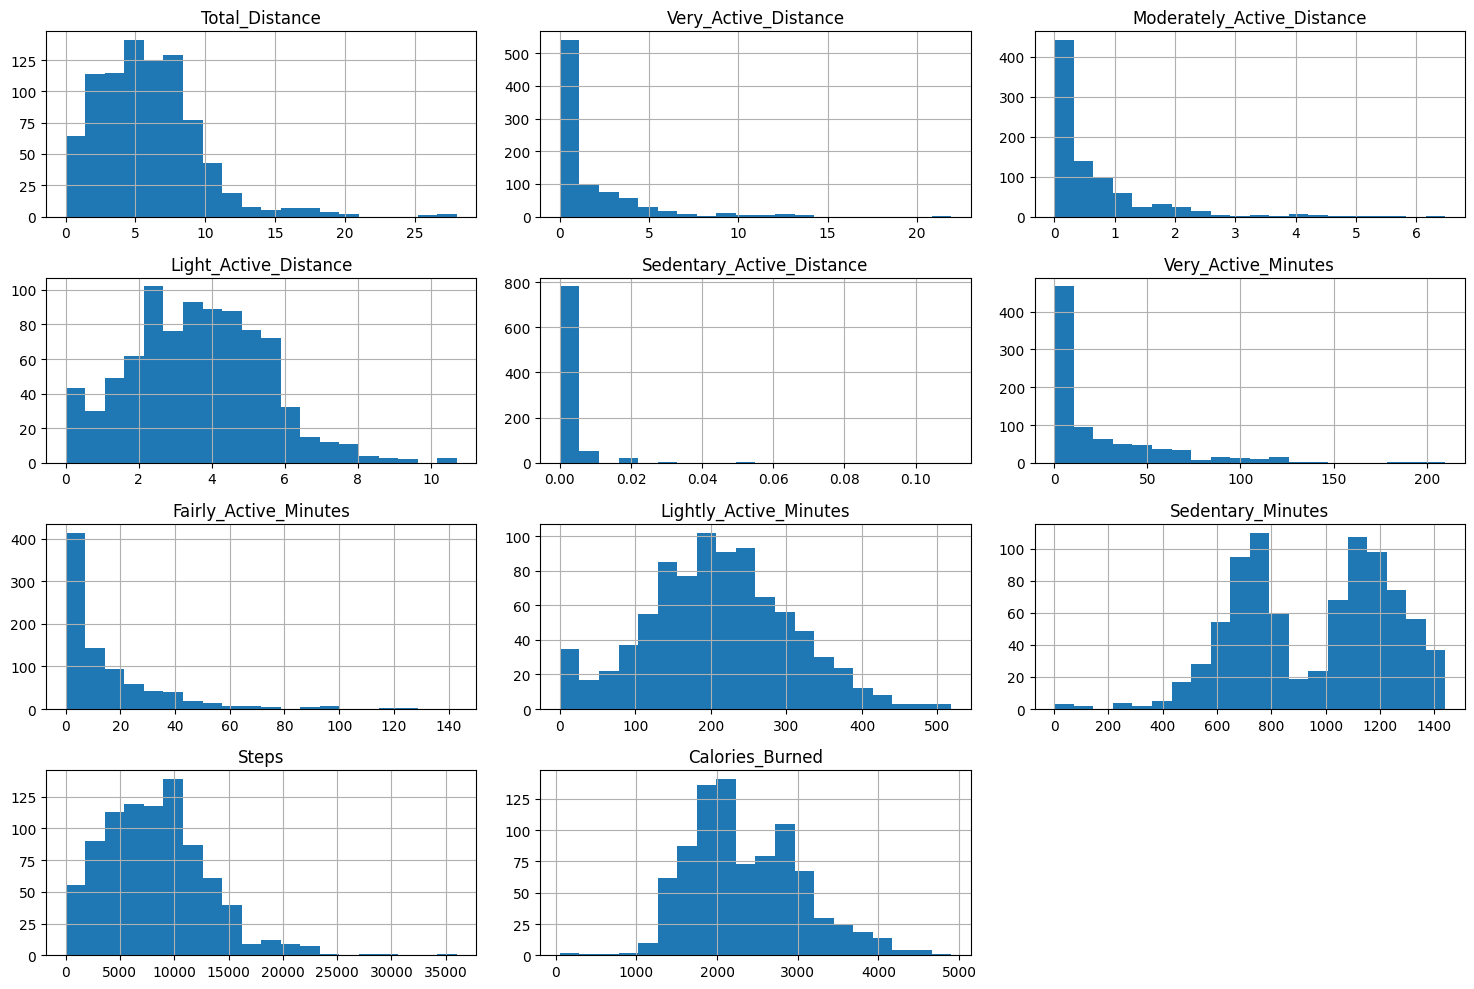

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
import random
import pandas as pd
from google.colab import files

np.random.seed(42)
random.seed(42)
Faker.seed(42)

df1 = df.copy()

df1['UserID'] = np.random.randint(1000000, 9999999, size=len(df1))

fake = Faker()
locations = ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
location_weights = [0.32, 0.26, 0.20, 0.10, 0.07, 0.02, 0.02, 0.01]

num_rows = len(df1)
df1['Name'] = [fake.first_name() for _ in range(num_rows)]
df1['Location'] = random.choices(locations, weights=location_weights, k=num_rows)

df1.drop(columns=['Date', 'Logged_Activities_Distance', 'Tracker_Distance'], inplace=True)

front_cols = ['UserID', 'Name', 'Location']
other_cols = [col for col in df1.columns if col not in front_cols]
df1 = df1[front_cols + other_cols]

df1 = df1[df1['Steps'] != 0]


print(df1.head())

numeric_cols = df1.select_dtypes(include=['number']).drop(columns=['UserID']).columns
df1[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

df1.to_excel("ImprovedData.xlsx", index=False)
files.download("ImprovedData.xlsx")


# Start Here

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df1 = pd.read_excel("ImprovedData.xlsx")
print(df1.head())


Saving ImprovedData.xlsx to ImprovedData (1).xlsx
    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD            8.02                  2.03   
1  7550634     Angel      NSW            5.82                  2.28   
2  5304572    Joshua      NSW            0.11                  0.00   
3  3234489   Jeffrey      NSW            7.21                  0.00   
4  8204212      Jill      QLD            7.86                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4                        0.73                   6.79   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                        0.0                   26                     10   
1                        0.0      

# Adding New Features to the Dataset

In [3]:
df2 = df1.copy()  # Keep original dataframe the same
df2["Effort_Distance"] = df2["Very_Active_Distance"] * 3 + df2["Moderately_Active_Distance"] * 2 + df2["Light_Active_Distance"]
df2["Effort_Time"] = df2["Very_Active_Minutes"] * 3 + df2["Fairly_Active_Minutes"] * 2 + df2["Lightly_Active_Minutes"]
df2["Minutes"] = df2["Very_Active_Minutes"] + df2["Fairly_Active_Minutes"] + df2["Lightly_Active_Minutes"]
df2["Steps_per_Minute"] = df2["Steps"] / (df2["Minutes"] + 1e-8)
df2["Calories_per_Minute"] = df2["Calories_Burned"] / (df2["Minutes"] + 1e-8)
df2["Calories_per_Step"] = df2["Calories_Burned"] / (df2["Steps"] + 1e-8)
df2["Calories_per_Distance"] = df2["Calories_Burned"] / (df2["Total_Distance"] + 1e-8)
df2["Distance_per_Minute"] = df2["Total_Distance"] / (df2["Minutes"] + 1e-8)
df2["Distance_per_Step"] = df2["Total_Distance"] / (df2["Steps"] + 1e-8)
df2.head(15)

,UserID,Name,Location,Total_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,...,Calories_Burned,Effort_Distance,Effort_Time,Minutes,Steps_per_Minute,Calories_per_Minute,Calories_per_Step,Calories_per_Distance,Distance_per_Minute,Distance_per_Step
0,7423388,Danielle,QLD,8.02,2.03,0.48,5.52,0.00,26,10,...,2536,12.570000,447,385,27.140260,6.587013,0.242703,316.209458,0.020831,0.000768
1,7550634,Angel,NSW,5.82,2.28,0.90,2.64,0.00,30,16,...,2902,11.280000,257,181,44.204420,16.033149,0.362705,498.625414,0.032155,0.000727
2,5304572,Joshua,NSW,0.11,0.00,0.00,0.11,0.00,0,0,...,2100,0.110000,12,12,12.666667,175.000000,13.815789,19090.907529,0.009167,0.000724
3,3234489,Jeffrey,NSW,7.21,0.00,0.34,6.87,0.00,0,7,...,2450,7.550000,366,359,26.582173,6.824513,0.256733,339.805823,0.020084,0.000756
4,8204212,Jill,QLD,7.86,0.34,0.73,6.79,0.00,6,19,...,3013,9.270000,314,283,36.106007,10.646643,0.294872,383.333326,0.027774,0.000769
5,5472471,Erica,QLD,0.50,0.06,0.20,0.24,0.00,2,13,...,1993,0.820000,47,30,23.433333,66.433333,2.834993,3985.999920,0.016667,0.000711
6,5523669,Patricia,SA,5.50,0.53,0.59,1.31,0.00,8,15,...,2135,4.080000,150,119,68.941176,17.941176,0.260239,388.181817,0.046218,0.000670
7,8404852,Christopher,NSW,4.98,0.06,0.25,4.66,0.01,1,6,...,1906,5.340000,378,370,20.032432,5.151351,0.257151,382.730921,0.013459,0.000672
8,5981505,Robert,VIC,1.99,0.00,0.00,1.99,0.00,0,0,...,2095,1.990000,194,194,15.262887,10.798969,0.707531,1052.763809,0.010258,0.000672
9,2766891,Anthony,NSW,5.83,0.00,0.00,5.82,0.00,0,0,...,2712,5.820000,251,251,30.701195,10.804781,0.351934,465.180108,0.023227,0.000757


# New Dataset Description

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df_features = df2.iloc[:, 1:]  # All columns except the first
print(df_features.isna().sum())

print((df_features == float('inf')).sum())
print(df2.describe(include='all'))

Name                          0
Location                      0
Total_Distance                0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
Effort_Distance               0
Effort_Time                   0
Minutes                       0
Steps_per_Minute              0
Calories_per_Minute           0
Calories_per_Step             0
Calories_per_Distance         0
Distance_per_Minute           0
Distance_per_Step             0
dtype: int64
Name                          0
Location                      0
Total_Distance                0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes      

# Removing Outliers from New Features

In [5]:
import pandas as pd
import numpy as np

columns_to_check = ['Steps_per_Minute', 'Calories_per_Minute', 'Calories_per_Step',
                    'Calories_per_Distance', 'Distance_per_Minute', 'Distance_per_Step']

for col in columns_to_check:
    mean = df2[col].mean()
    std = df2[col].std()

    lower_bound = mean - 5 * std
    upper_bound = mean + 5 * std

    df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

non_null_counts = df2.count()

print(non_null_counts)





UserID                        847
Name                          847
Location                      847
Total_Distance                847
Very_Active_Distance          847
Moderately_Active_Distance    847
Light_Active_Distance         847
Sedentary_Active_Distance     847
Very_Active_Minutes           847
Fairly_Active_Minutes         847
Lightly_Active_Minutes        847
Sedentary_Minutes             847
Steps                         847
Calories_Burned               847
Effort_Distance               847
Effort_Time                   847
Minutes                       847
Steps_per_Minute              847
Calories_per_Minute           847
Calories_per_Step             847
Calories_per_Distance         847
Distance_per_Minute           847
Distance_per_Step             847
dtype: int64


# MinMax Normalization

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_meta = df2.iloc[:, :3]
df_features = df2.iloc[:, 3:]

# Min-Max normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_features)
df_normalized = pd.DataFrame(df_normalized, columns=df_features.columns)

df_final = pd.concat([df_meta.reset_index(drop=True), df_normalized.reset_index(drop=True)], axis=1)

print(df_final.head())



    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD        0.285867              0.092609   
1  7550634     Angel      NSW        0.207352              0.104015   
2  5304572    Joshua      NSW        0.003569              0.000000   
3  3234489   Jeffrey      NSW        0.256959              0.000000   
4  8204212      Jill      QLD        0.280157              0.015511   

   Moderately_Active_Distance  Light_Active_Distance  \
0                    0.074074               0.514953   
1                    0.138889               0.245794   
2                    0.000000               0.009346   
3                    0.052469               0.641121   
4                    0.112654               0.633645   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  ...  \
0                        0.0             0.123810               0.069930  ...   
1                        0.0             0.142857               0.111888  

# Correlation Heatmap

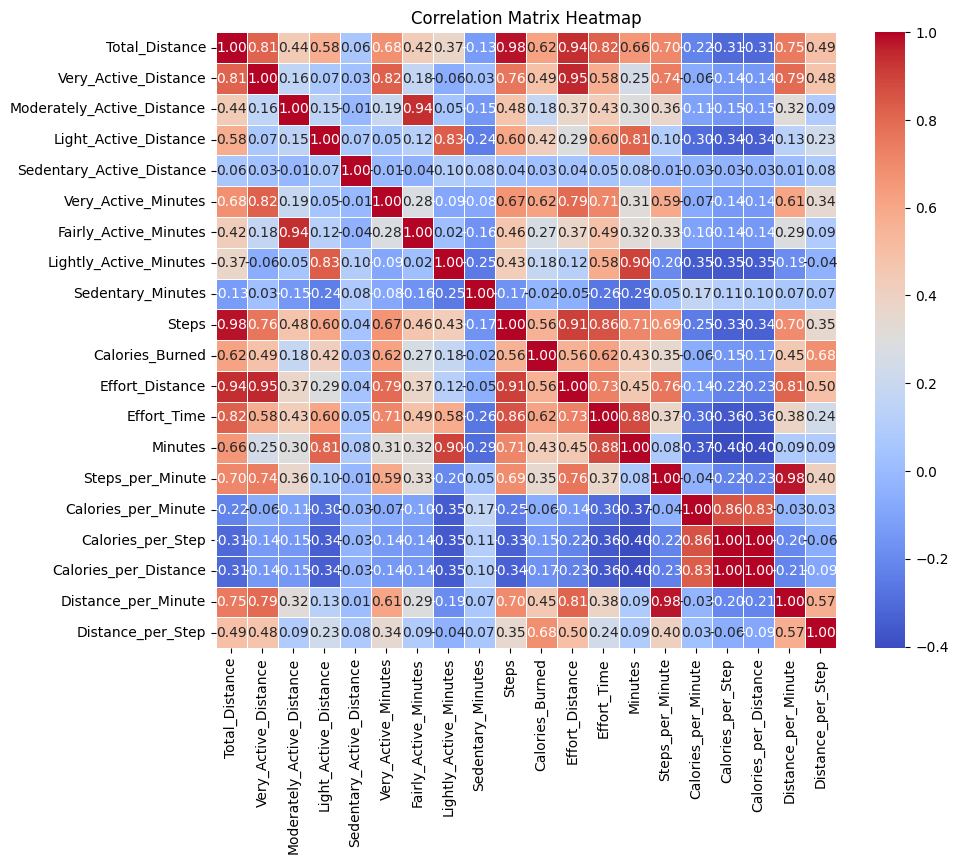

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_final.iloc[:, 3:].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()



# Removing Unhelpful Features- Correlation Matrix

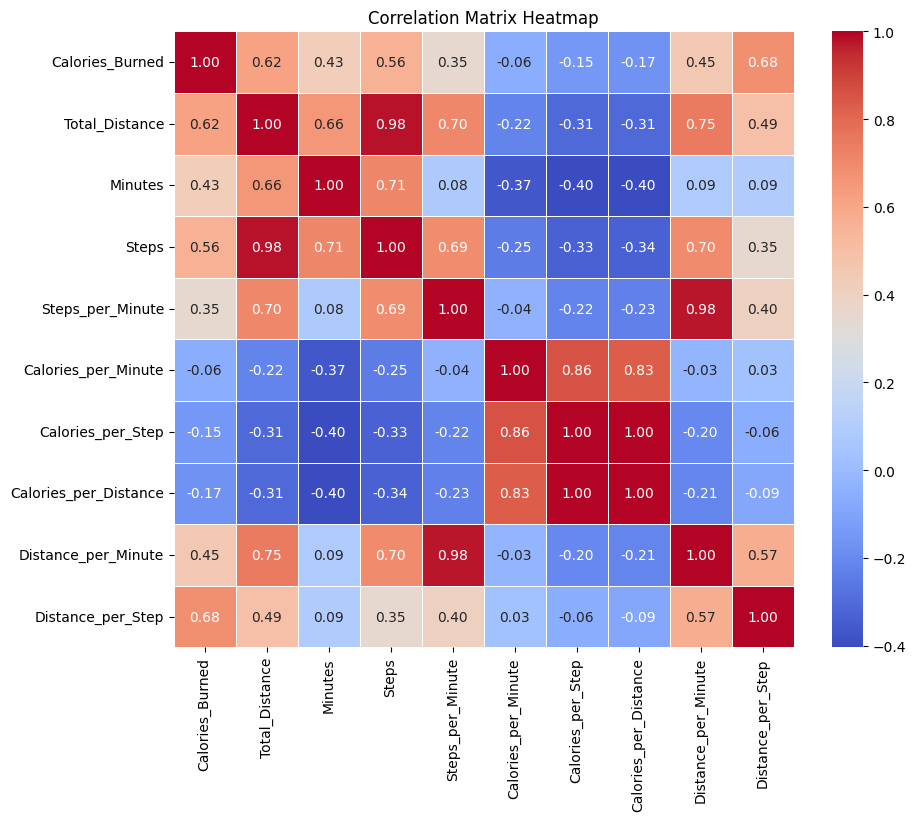

In [8]:
df_final1 = df_final[['Calories_Burned','Total_Distance', 'Minutes', 'Steps', 'Steps_per_Minute', 'Calories_per_Minute', 'Calories_per_Step', 'Calories_per_Distance', 'Distance_per_Minute', 'Distance_per_Step']]

correlation_matrix1 = df_final1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()


# Final Removal of Features(high correlations)- Histograms

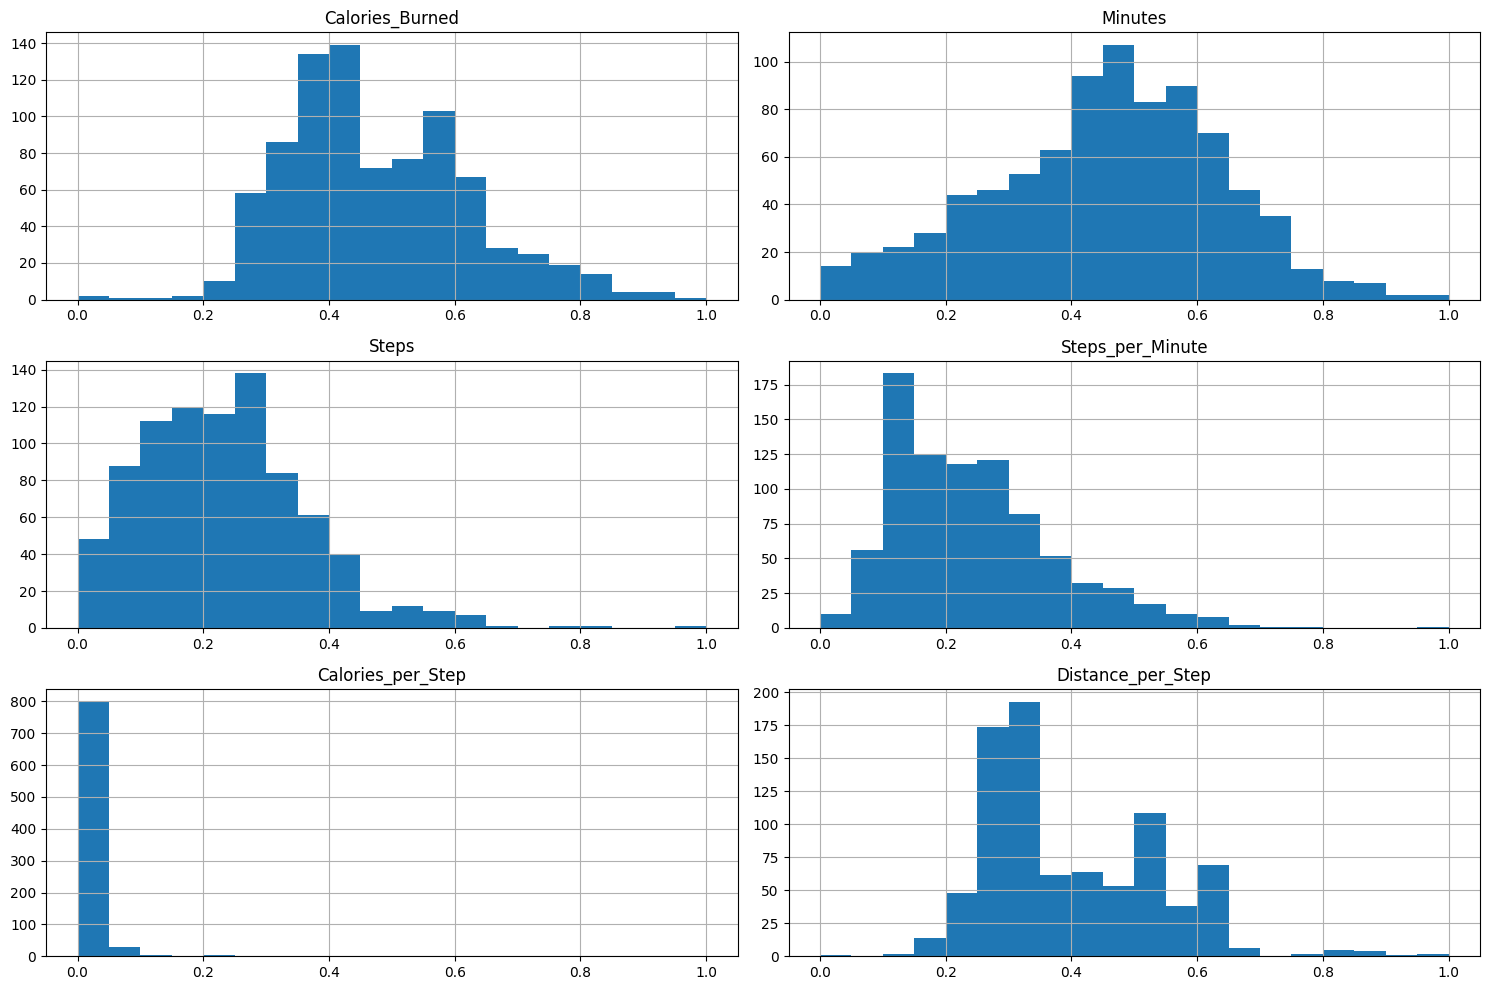

In [9]:
df_final_subset = df_final[['Calories_Burned', 'Minutes', 'Steps', 'Steps_per_Minute', 'Calories_per_Step', 'Distance_per_Step']]

df_final_subset.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()
# Calculate the correlation matrix
correlation_matrix2 = df_final_subset.corr()



# Correlation Matrix of Selected Features

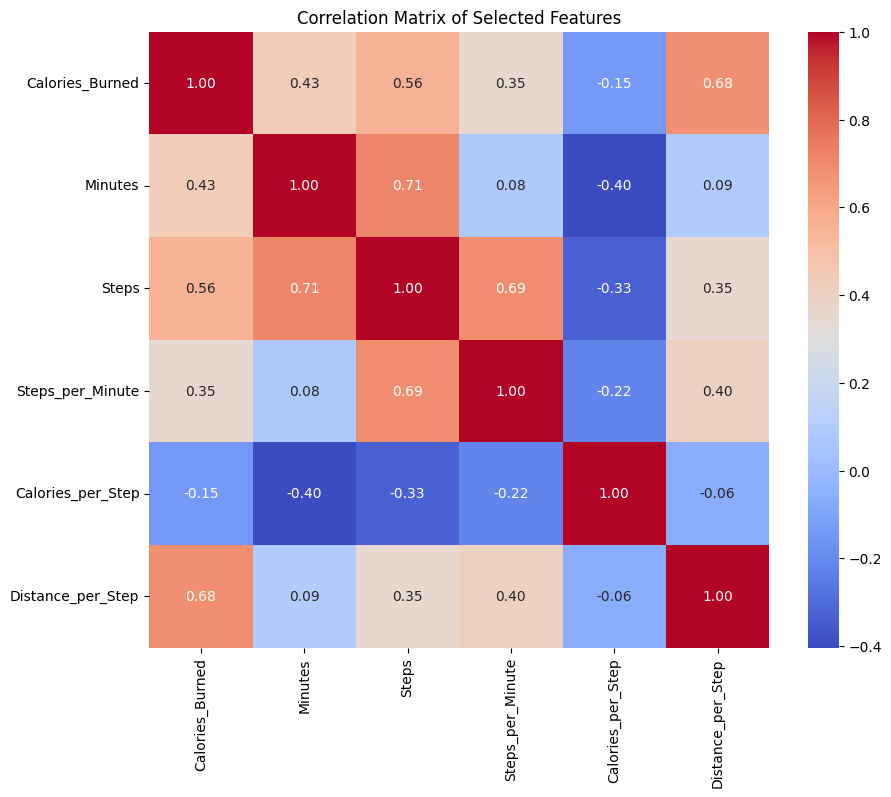

In [10]:
correlation_matrix2 = df_final_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


# Description of Feature Details

In [11]:
df_final_subset.describe()

,Calories_Burned,Minutes,Steps,Steps_per_Minute,Calories_per_Step,Distance_per_Step
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.477001,0.455250,0.232912,0.242669,0.024605,0.402100
std,0.145047,0.183685,0.130791,0.130505,0.070401,0.138592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372834,0.340909,0.137353,0.138566,0.008031,0.296444
50%,0.447401,0.467273,0.224321,0.221679,0.012208,0.345190
75%,0.573432,0.585455,0.307955,0.312269,0.019636,0.515792
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Kmeans Clustering

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

columns_to_cluster = ['Steps', 'Calories_Burned', 'Minutes', 'Distance_per_Step', 'Steps_per_Minute', 'Calories_per_Step']

df_cleaned = df_final_subset[columns_to_cluster].dropna()

kmeans = KMeans(n_clusters=20, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned)

print(df_cleaned.head())


      Steps  Calories_Burned   Minutes  Distance_per_Step  Steps_per_Minute  \
0  0.289762         0.512376  0.696364           0.544095          0.185693   
1  0.221765         0.587871  0.325455           0.450525          0.355684   
2  0.003750         0.422442  0.018182           0.441839          0.041508   
3  0.264596         0.494637  0.649091           0.516091          0.180133   
4  0.283345         0.610767  0.510909           0.548043          0.275009   

   Calories_per_Step  cluster  
0           0.009326       18  
1           0.015795       19  
2           0.741002        4  
3           0.010082       18  
4           0.012138        0  


# Clustering Function w/ 20 Clusters


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

columns_to_cluster = ['Steps', 'Calories_Burned', 'Minutes',
                      'Distance_per_Step', 'Steps_per_Minute', 'Calories_per_Step']

df_features = df2[columns_to_cluster].dropna()
original_indices = df_features.index

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_features)
df_normalized = pd.DataFrame(X_normalized, columns=columns_to_cluster, index=original_indices)

kmeans = KMeans(n_clusters=20, random_state=42)
df_normalized['cluster'] = kmeans.fit_predict(df_normalized)

df_features = df_features.copy()
df_features['cluster'] = df_normalized['cluster']

def get_user_input():
    print("Please enter the following daily exercise data:")

    while True:
        try:
            steps = float(input("Steps: "))
            if steps < 0: raise ValueError("Steps cannot be negative.")
            calories_burned = float(input("Calories burned: "))
            if calories_burned < 0: raise ValueError("Calories burned cannot be negative.")
            minutes = float(input("Minutes exercised: "))
            if minutes <= 0: raise ValueError("Minutes must be greater than zero.")
            distance = float(input("Total distance (in km): "))
            if distance < 0: raise ValueError("Distance cannot be negative.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    return {
        'Steps': steps,
        'Calories_Burned': calories_burned,
        'Minutes': minutes,
        'Distance_per_Step': distance / steps if steps else 0,
        'Steps_per_Minute': steps / minutes if minutes else 0,
        'Calories_per_Step': calories_burned / steps if steps else 0
    }

def predict_user_cluster(user_input_raw):
    user_df = pd.DataFrame([user_input_raw], columns=columns_to_cluster)
    user_input_norm = scaler.transform(user_df)
    cluster = kmeans.predict(user_input_norm)
    return cluster[0], user_input_norm

def find_nearest_neighbors(user_input_norm, num_neighbors=5):
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1)
    nbrs.fit(X_normalized)
    distances, indices = nbrs.kneighbors(user_input_norm)

    selected_columns = ['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']
    print(f"\n🔍 Top {num_neighbors} nearest users (by all features):\n")

    for i in range(1, num_neighbors + 1):
        idx = indices[0][i]
        original_idx = original_indices[idx]
        cluster_label = df_normalized.loc[original_idx, 'cluster']

        print(f"📌 User at index {original_idx} (Cluster {cluster_label}):")
        if 'UserID' in df2.columns:
            print(f"🔹 UserID: {df2.loc[original_idx, 'UserID']}")
        print(f"📝 Name: {df2.loc[original_idx, 'Name']}")
        print(f"🌍 Location: {df2.loc[original_idx, 'Location']}")
        print(df2.loc[original_idx, selected_columns].to_string())
        print("-" * 50)

def get_random_users_from_cluster(cluster_label, num_users=5):
    df2_with_clusters = df2.loc[original_indices].copy()
    df2_with_clusters['cluster'] = df_features['cluster']
    cluster_members = df2_with_clusters[df2_with_clusters['cluster'] == cluster_label]

    sampled_users = cluster_members.sample(n=min(num_users, len(cluster_members)), random_state=42)

    print(f"\n🎯 {len(sampled_users)} Random Users from Cluster {cluster_label}:\n")
    for idx, row in sampled_users.iterrows():
        print(f"📌 User at index {idx}:")
        print(f"📝 Name: {row['Name']}")
        print(f"🌍 Location: {row['Location']}")
        print(row[['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']].to_string())
        print("-" * 50)

def get_closest_users_by_metric(user_input, metric, top_n=5):
    if metric not in ['Steps', 'Minutes', 'Calories_Burned', 'Total_Distance']:
        print(f"⚠️ Invalid metric: {metric}")
        return

    df_compare = df2.loc[original_indices].copy()
    df_compare['abs_diff'] = abs(df_compare[metric] - user_input[metric])

    closest_users = df_compare.nsmallest(top_n, 'abs_diff')

    print(f"\n📈 Top {top_n} closest users by '{metric}':\n")
    for idx, row in closest_users.iterrows():
        print(f"📌 User at index {idx}:")
        print(f"📝 Name: {row['Name']}")
        print(f"🌍 Location: {row['Location']}")
        print(row[['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']].to_string())
        print("-" * 50)

user_input = get_user_input()
predicted_cluster, user_input_norm = predict_user_cluster(user_input)

print(f"\n✅ The user belongs to cluster: {predicted_cluster}")
print("📊 Normalized user input:")
print(pd.DataFrame(user_input_norm, columns=columns_to_cluster).to_string(index=False))

find_nearest_neighbors(user_input_norm, num_neighbors=5)
get_random_users_from_cluster(predicted_cluster, num_users=5)
get_closest_users_by_metric(user_input, 'Steps')
get_closest_users_by_metric(user_input, 'Minutes')
get_closest_users_by_metric(user_input, 'Calories_Burned')




Please enter the following daily exercise data:
Steps: 20000
Calories burned: 3000
Minutes exercised: 200
Total distance (in km): 20

✅ The user belongs to cluster: 8
📊 Normalized user input:
   Steps  Calories_Burned  Minutes  Distance_per_Step  Steps_per_Minute  Calories_per_Step
0.555052         0.608086     0.36           1.086144          0.911515           0.004328

🔍 Top 5 nearest users (by all features):

📌 User at index 179 (Cluster 8):
🔹 UserID: 2659066
📝 Name: Shane
🌍 Location: VIC
Calories_Burned         3477
Minutes                  286
Total_Distance     16.299999
Steps                  18193
--------------------------------------------------
📌 User at index 772 (Cluster 8):
🔹 UserID: 4377778
📝 Name: Melissa
🌍 Location: WA
Calories_Burned     3710
Minutes              309
Total_Distance     18.25
Steps              20226
--------------------------------------------------
📌 User at index 749 (Cluster 8):
🔹 UserID: 1953959
📝 Name: Janet
🌍 Location: QLD
Calories_Burned     3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [14]:
numeric_cols = df_features.select_dtypes(include='number').columns

cluster_medians = df_features.groupby('cluster')[numeric_cols].median()

cluster_medians['count'] = df_features.groupby('cluster').size()

print("Cluster Medians with Counts:")
print(cluster_medians)


Cluster Medians with Counts:
           Steps  Calories_Burned  Minutes  Distance_per_Step  \
cluster                                                         
0         9217.0           3061.0    266.0           0.000780   
1        10594.5           1787.0    257.0           0.000662   
2         3974.0           1725.0    195.0           0.000662   
3        14999.0           3383.0    277.0           0.000783   
4          144.0           2011.0      9.0           0.000697   
5         6714.0           1908.5    309.5           0.000665   
6         3399.5           2208.5     94.5           0.000720   
7        12363.0           3727.0    368.0           0.000747   
8        20899.0           3677.5    323.5           0.000877   
9         1729.5           1612.5     86.5           0.000661   
10        9141.5           2124.0    365.5           0.000672   
11        4534.0           2646.0    159.5           0.000751   
12       14194.0           2797.0    388.0           0.000704

# Hierarchical Clustering

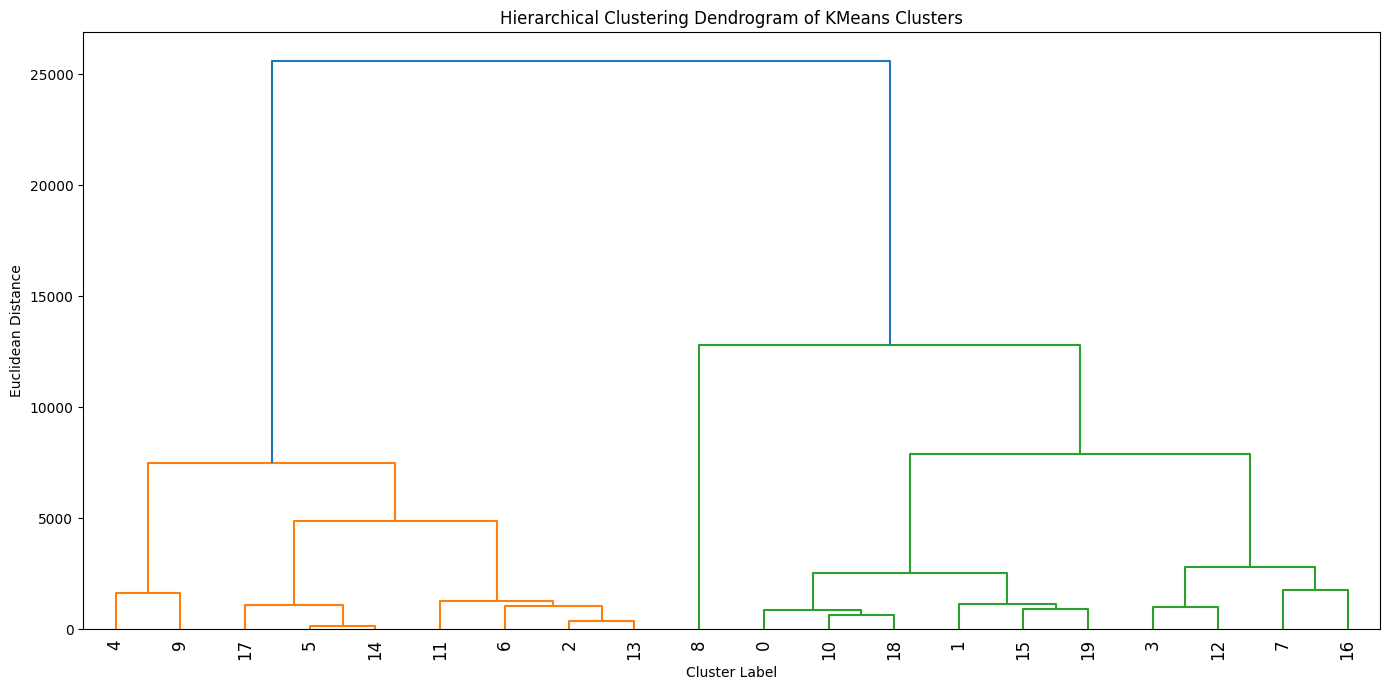

In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

cluster_features = cluster_medians.drop(columns=['count'], errors='ignore')

distance_matrix = pdist(cluster_features, metric='euclidean')

linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linkage_matrix, labels=cluster_features.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram of KMeans Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


# Kmeans Clustering (8 clusters)

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

columns_to_cluster = ['Steps', 'Calories_Burned', 'Minutes',
                      'Distance_per_Step', 'Steps_per_Minute', 'Calories_per_Step']

df_features = df2[columns_to_cluster].dropna()
original_indices = df_features.index

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_features)
df_normalized = pd.DataFrame(X_normalized, columns=columns_to_cluster, index=original_indices)

kmeans = KMeans(n_clusters=8, random_state=42)
df_normalized['cluster'] = kmeans.fit_predict(df_normalized)

df_features = df_features.copy()
df_features['cluster'] = df_normalized['cluster']

def get_user_input():
    print("Please enter the following daily exercise data:")

    while True:
        try:
            steps = float(input("Steps: "))
            if steps < 0: raise ValueError("Steps cannot be negative.")
            calories_burned = float(input("Calories burned: "))
            if calories_burned < 0: raise ValueError("Calories burned cannot be negative.")
            minutes = float(input("Minutes exercised: "))
            if minutes <= 0: raise ValueError("Minutes must be greater than zero.")
            distance = float(input("Total distance (in km): "))
            if distance < 0: raise ValueError("Distance cannot be negative.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    return {
        'Steps': steps,
        'Calories_Burned': calories_burned,
        'Minutes': minutes,
        'Distance_per_Step': distance / steps if steps else 0,
        'Steps_per_Minute': steps / minutes if minutes else 0,
        'Calories_per_Step': calories_burned / steps if steps else 0
    }

def predict_user_cluster(user_input_raw):
    user_df = pd.DataFrame([user_input_raw], columns=columns_to_cluster)
    user_input_norm = scaler.transform(user_df)
    cluster = kmeans.predict(user_input_norm)
    return cluster[0], user_input_norm

def find_nearest_neighbors(user_input_norm, num_neighbors=5):
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1)
    nbrs.fit(X_normalized)
    distances, indices = nbrs.kneighbors(user_input_norm)

    selected_columns = ['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']
    print(f"\n🔍 Top {num_neighbors} nearest users (by all features):\n")

    for i in range(1, num_neighbors + 1):
        idx = indices[0][i]
        original_idx = original_indices[idx]
        cluster_label = df_normalized.loc[original_idx, 'cluster']

        print(f"📌 User at index {original_idx} (Cluster {cluster_label}):")
        if 'UserID' in df2.columns:
            print(f"🔹 UserID: {df2.loc[original_idx, 'UserID']}")
        print(f"📝 Name: {df2.loc[original_idx, 'Name']}")
        print(f"🌍 Location: {df2.loc[original_idx, 'Location']}")
        print(df2.loc[original_idx, selected_columns].to_string())
        print("-" * 50)

def get_random_users_from_cluster(cluster_label, num_users=5):
    df2_with_clusters = df2.loc[original_indices].copy()
    df2_with_clusters['cluster'] = df_features['cluster']
    cluster_members = df2_with_clusters[df2_with_clusters['cluster'] == cluster_label]

    sampled_users = cluster_members.sample(n=min(num_users, len(cluster_members)), random_state=42)

    print(f"\n🎯 {len(sampled_users)} Random Users from Cluster {cluster_label}:\n")
    for idx, row in sampled_users.iterrows():
        print(f"📌 User at index {idx}:")
        print(f"📝 Name: {row['Name']}")
        print(f"🌍 Location: {row['Location']}")
        print(row[['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']].to_string())
        print("-" * 50)

def get_closest_users_by_metric(user_input, metric, top_n=5):
    if metric not in ['Steps', 'Minutes', 'Calories_Burned', 'Total_Distance']:
        print(f"⚠️ Invalid metric: {metric}")
        return

    df_compare = df2.loc[original_indices].copy()
    df_compare['abs_diff'] = abs(df_compare[metric] - user_input[metric])

    closest_users = df_compare.nsmallest(top_n, 'abs_diff')

    print(f"\n📈 Top {top_n} closest users by '{metric}':\n")
    for idx, row in closest_users.iterrows():
        print(f"📌 User at index {idx}:")
        print(f"📝 Name: {row['Name']}")
        print(f"🌍 Location: {row['Location']}")
        print(row[['Calories_Burned', 'Minutes', 'Total_Distance', 'Steps']].to_string())
        print("-" * 50)

user_input = get_user_input()
predicted_cluster, user_input_norm = predict_user_cluster(user_input)

print(f"\n✅ The user belongs to cluster: {predicted_cluster}")
print("📊 Normalized user input:")
print(pd.DataFrame(user_input_norm, columns=columns_to_cluster).to_string(index=False))

find_nearest_neighbors(user_input_norm, num_neighbors=5)
get_random_users_from_cluster(predicted_cluster, num_users=5)
get_closest_users_by_metric(user_input, 'Steps')
get_closest_users_by_metric(user_input, 'Minutes')
get_closest_users_by_metric(user_input, 'Calories_Burned')

Please enter the following daily exercise data:
Steps: 20000
Calories burned: 3000
Minutes exercised: 200
Total distance (in km): 20

✅ The user belongs to cluster: 3
📊 Normalized user input:
   Steps  Calories_Burned  Minutes  Distance_per_Step  Steps_per_Minute  Calories_per_Step
0.555052         0.608086     0.36           1.086144          0.911515           0.004328

🔍 Top 5 nearest users (by all features):

📌 User at index 179 (Cluster 3):
🔹 UserID: 2659066
📝 Name: Shane
🌍 Location: VIC
Calories_Burned         3477
Minutes                  286
Total_Distance     16.299999
Steps                  18193
--------------------------------------------------
📌 User at index 772 (Cluster 7):
🔹 UserID: 4377778
📝 Name: Melissa
🌍 Location: WA
Calories_Burned     3710
Minutes              309
Total_Distance     18.25
Steps              20226
--------------------------------------------------
📌 User at index 749 (Cluster 7):
🔹 UserID: 1953959
📝 Name: Janet
🌍 Location: QLD
Calories_Burned     3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [17]:
numeric_cols = df_features.select_dtypes(include='number').columns

cluster_medians = df_features.groupby('cluster')[numeric_cols].median()

cluster_medians['count'] = df_features.groupby('cluster').size()

print("Cluster Medians with Counts:")
print(cluster_medians)

Cluster Medians with Counts:
           Steps  Calories_Burned  Minutes  Distance_per_Step  \
cluster                                                         
0         8290.0           2977.0    266.0           0.000769   
1        11413.5           2012.5    273.0           0.000661   
2         4063.5           1732.0    191.5           0.000661   
3        13358.5           2948.5    236.5           0.000773   
4          197.0           1799.0     12.0           0.000671   
5         8563.0           2124.0    353.0           0.000672   
6         3425.5           2321.5    115.5           0.000726   
7        15050.0           3659.0    367.0           0.000769   

         Steps_per_Minute  Calories_per_Step  cluster  count  
cluster                                                       
0               31.456339           0.367256      0.0    142  
1               41.282304           0.178079      1.0    144  
2               21.283601           0.429128      2.0    188  
3    

### Suggested User Feedback Based on Cluster Assignment

Each user is assigned to a cluster (0–7) based on their input data (steps, calories, minutes, distance). The following labels and messages can be displayed to users based on their assigned cluster:

| Cluster | Label                 | Message                                                                 |
|---------|-----------------------|-------------------------------------------------------------------------|
| 0       | 🌿 Consistent Mover    | "Nice and steady! You kept moving at a good pace throughout the day."  |
| 1       | 🚶 Light Walker        | "Lots of steps! You moved a lot today at a calm, steady pace."         |
| 2       | 💤 Low Movement        | "You took it easy today. Maybe tomorrow's a better day for a walk!"    |
| 3       | 🏃 Focused Exerciser   | "Well done! You got in some focused, high-intensity movement."         |
| 4       | 😴 Rest Day            | "You didn’t move much today — sounds like a well-deserved rest!"       |
| 5       | 🐢 Slow and Steady     | "You were active for a long time today — slow and steady wins the race." |
| 6       | 💪 Efficient Burner    | "You burned a lot in a short time — maybe lifting or intense chores?"  |
| 7       | 🔥 Peak Performer      | "Incredible day! That’s elite-level activity. Keep it up!"             |

These messages can be used to personalize the dashboard or app interface, giving users meaningful feedback based on their daily activity patterns.